# Students: LAITA Sami

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification

# Datasets


In the first cell, we provide four toy datasets for classification, featuring both linear and non-linear decision frontiers. Using decision trees, random forests, and AdaBoost, we will develop and analyze classifiers capable of handling non-linear decision boundaries.


We also provide in the second cell auxiliary code for plotting the decision boundaries of the trees, called `plot_tree`. 


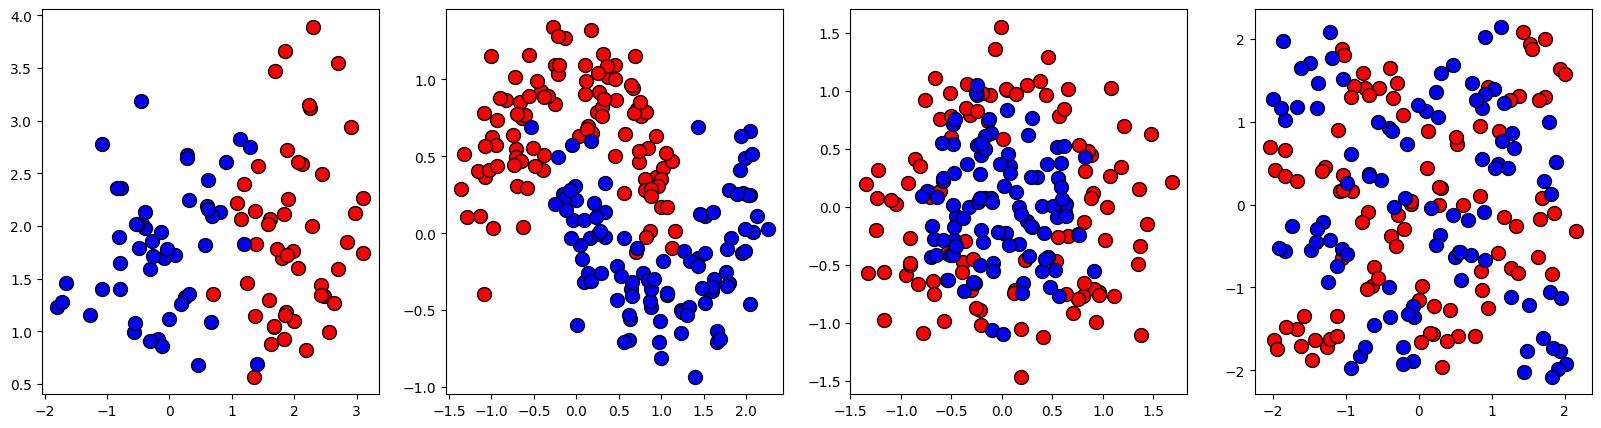

In [282]:
def rand_checkers(n1=100, n2=100, sigma=0.1):
    """ Sample n1 and n2 points from a noisy checker"""
    nbp = int(np.floor(n1 / 8))
    nbn = int(np.floor(n2 / 8))
    xapp = np.reshape(np.random.rand((nbp + nbn) * 16), [(nbp + nbn) * 8, 2])
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if (((i + j) % 2) == 0):
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 2 + 1] * nb
            xapp[idx:(idx + nb), 0] = np.random.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * np.random.randn(nb)
            xapp[idx:(idx + nb), 1] = np.random.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * np.random.randn(nb)
            idx += nb
    ind = np.arange((nbp + nbn) * 8)
    np.random.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])-1

plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1),
            rand_checkers()]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)
dataset = datasets[1]

In [283]:
def plot_tree(clf,X,y):
  n_classes = 2
  plot_colors = "rb"
  plot_step = 0.02
  plt.figure(figsize=(3,3))   
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  # Plot the training points
  for i, color in zip([-1,1], plot_colors):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, alpha=.2)
  plt.show()

# Impurity measures
## Exercises 1, 2, 3

**Question 1:**

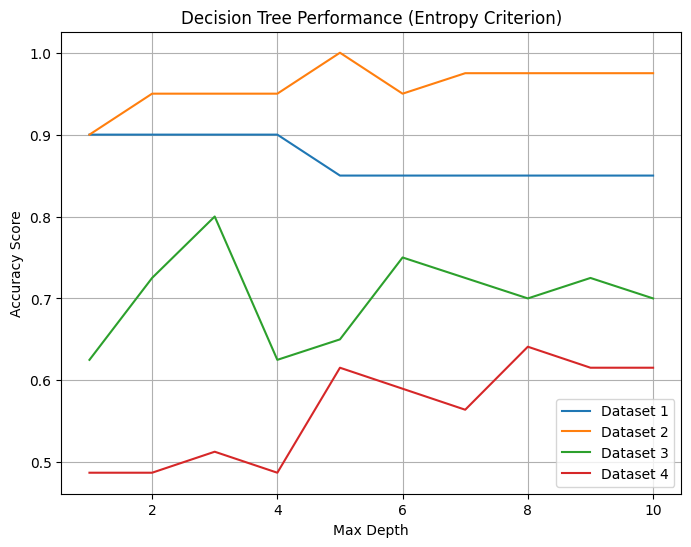

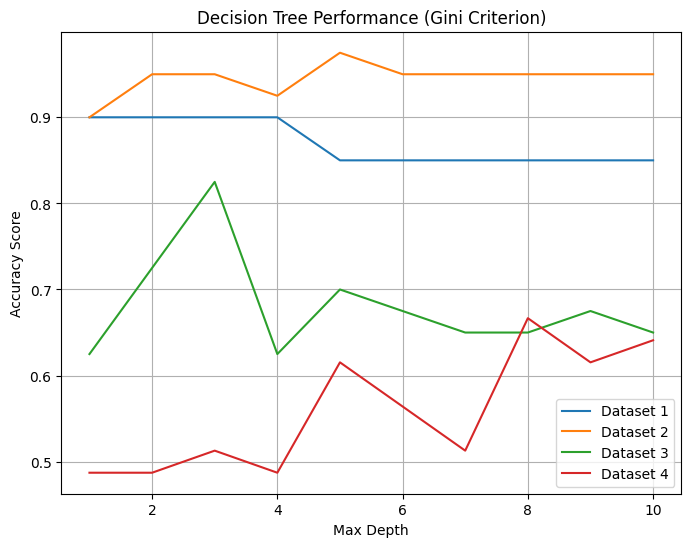

In [284]:
# Assuming datasets is a list of (X, y) pairs for the 4 datasets
dataset_names = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]

# Define criteria
criteria = ["entropy", "gini"]

# Loop over both criteria
for criterion in criteria:
    plt.figure(figsize=(8, 6))  # Create a new figure
    for fi, dataset in enumerate(datasets):
        X, y = dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scores = []
        for depth in range(1, 11):
            clf = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=42)
            clf.fit(X_train, y_train)
            scores.append(clf.score(X_test, y_test))

        plt.plot(range(1, 11), scores, label=dataset_names[fi])

    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy Score")
    plt.title(f"Decision Tree Performance ({criterion.capitalize()} Criterion)")
    plt.legend()
    plt.grid(True)
    plt.show()

**Question 2:**

Processing Dataset 1
Best max_depth for gini in Dataset 1: 1


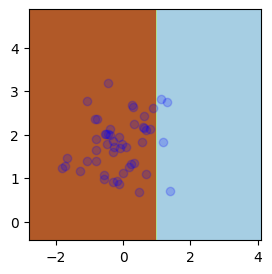

Best max_depth for entropy in Dataset 1: 1


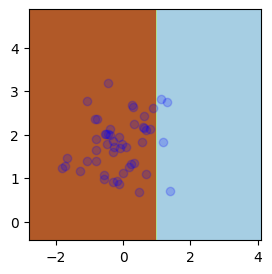

Processing Dataset 2
Best max_depth for gini in Dataset 2: 5


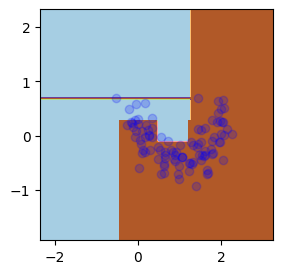

Best max_depth for entropy in Dataset 2: 5


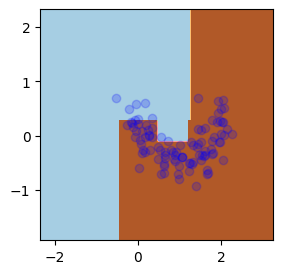

Processing Dataset 3
Best max_depth for gini in Dataset 3: 3


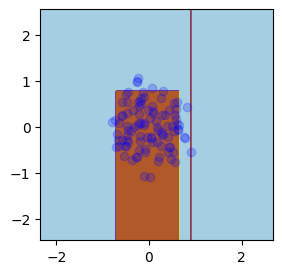

Best max_depth for entropy in Dataset 3: 3


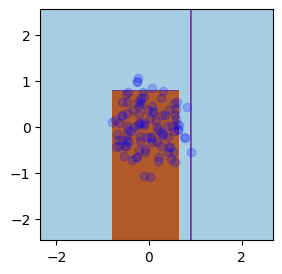

Processing Dataset 4
Best max_depth for gini in Dataset 4: 8


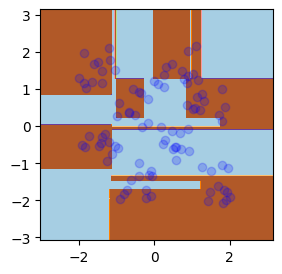

Best max_depth for entropy in Dataset 4: 8


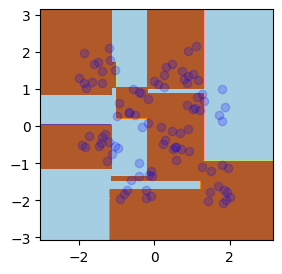

In [285]:
for fi, dataset in enumerate(datasets):
    print(f"Processing Dataset {fi + 1}")
    
    X, y = dataset  # Extract features and labels
    
    # Split data once for model selection
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for criterion in ["gini", "entropy"]:
        scores = []

        # Find best max_depth by training on train set and evaluating on test set
        for i in range(1, 11):
            clf = DecisionTreeClassifier(max_depth=i, criterion=criterion, random_state=42)
            clf.fit(X_train, y_train)
            scores.append(clf.score(X_test, y_test))

        # Get best max_depth
        best_depth = np.argmax(scores) + 1  # Adding 1 because depths start from 1
        print(f"Best max_depth for {criterion} in Dataset {fi + 1}: {best_depth}")

        # Retrain the best model on the **entire dataset (X, y)**
        best_clf = DecisionTreeClassifier(max_depth=best_depth, criterion=criterion, random_state=42)
        best_clf.fit(X, y)  # Train on **full dataset**

        # Plot decision boundary using the provided plot_tree function
        plot_tree(best_clf, X, y)

**Question 3:**

Best criterion and max_depth for dataset 2 is gini and 10


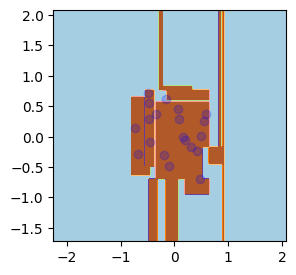

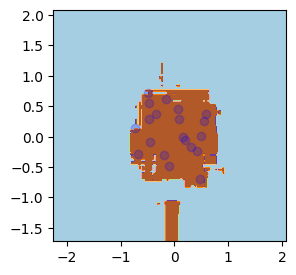

In [286]:
# Select the best impurity measure and max_depth for dataset 2 (blobs)

dataset = datasets[2]
X = dataset[0]
y = dataset[1]
scores = []
for criterion in ["gini", "entropy"]:
    for i in range(1, 11):
        clf = DecisionTreeClassifier(max_depth=i, criterion=criterion)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        clf.fit(X_train, y_train)
        scores.append((criterion, i, clf.score(X_test, y_test)))
scores = np.array(scores)
best = np.argmax(scores[:, 2])
print(f"Best criterion and max_depth for dataset 2 is {scores[best, 0]} and {scores[best, 1]}")

# compare the decision frontier with that of random forests using only the testing data.

from sklearn.ensemble import RandomForestClassifier
clf = DecisionTreeClassifier(max_depth=int(scores[best, 1]), criterion=scores[best, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
plot_tree(clf, X_test, y_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
plot_tree(clf, X_test, y_test)
plt.show()

We notice that the decision boundaries arte both non linear and pretty similar but that of random forest presents some "artifacts".

# Ensembles
## Exercise 4, random forest

In [287]:
import numpy as np
from sklearn.datasets import  load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import shuffle

# Load datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Question: Perform a 5-fold cross-validation for each problem, considering whether they are regression tasks 
# (using RandomForestRegressor) orclassification tasks. Use the R2
# score for regression and accuracy for classification.

# Evaluate on Diabetes dataset (Regression)
X_diabetes, y_diabetes = shuffle(diabetes.data, diabetes.target, random_state=0)
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(regressor, X_diabetes, y_diabetes, cv=5, scoring="r2")
R2_score = scores.mean()
print(f"Diabetes dataset: {R2_score}")


# Evaluate on Iris dataset (Classification)
X_iris, y_iris = shuffle(iris.data, iris.target, random_state=0)
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
scores = cross_val_score(classifier, X_iris, y_iris, cv=5)
accuracy = scores.mean()
print(f"Iris dataset: {accuracy}")


# Evaluate on Digits dataset (Classification)
X_digits, y_digits = shuffle(digits.data, digits.target, random_state=0)
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
scores = cross_val_score(classifier, X_digits, y_digits, cv=5)
accuracy = scores.mean()
print(f"Digits dataset: {accuracy}")

Diabetes dataset: 0.4237073061115531
Iris dataset: 0.9533333333333334
Digits dataset: 0.9744011142061282


## Exercise 5, feature importance

To conduct a feature importance analysis for the Diabetes dataset, we will use Permutation Feature Importance, as it aligns with the definition given in our course. This method evaluates the importance of a feature by randomly permuting its values and observing the impact on model performance.

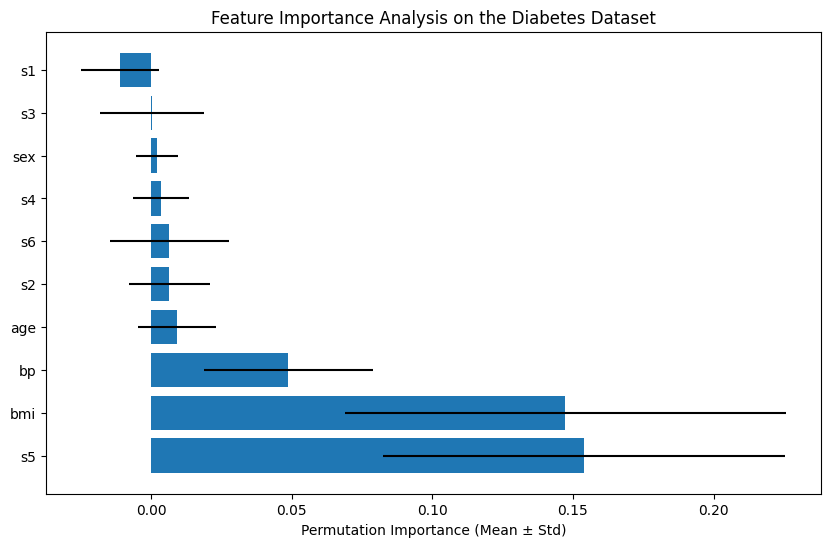

s5: Mean Importance = 0.1538, Std Dev = 0.0715
bmi: Mean Importance = 0.1473, Std Dev = 0.0784
bp: Mean Importance = 0.0487, Std Dev = 0.0300
age: Mean Importance = 0.0092, Std Dev = 0.0138
s2: Mean Importance = 0.0064, Std Dev = 0.0145
s6: Mean Importance = 0.0063, Std Dev = 0.0212
s4: Mean Importance = 0.0034, Std Dev = 0.0098
sex: Mean Importance = 0.0021, Std Dev = 0.0075
s3: Mean Importance = 0.0002, Std Dev = 0.0185
s1: Mean Importance = -0.0111, Std Dev = 0.0139


In [288]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)


# compute the feature importance and plot the results

result = permutation_importance(regressor, X_test, y_test, n_repeats=10, random_state=42)
importance_means = result.importances_mean
importance_std = result.importances_std
features = diabetes.feature_names
indices = np.argsort(importance_means)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importance_means[indices], xerr=importance_std[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Permutation Importance (Mean ± Std)")
plt.title("Feature Importance Analysis on the Diabetes Dataset")
plt.show()

for i in indices:
    print(f"{features[i]}: Mean Importance = {importance_means[i]:.4f}, Std Dev = {importance_std[i]:.4f}")

# Regression
## Exercise 6

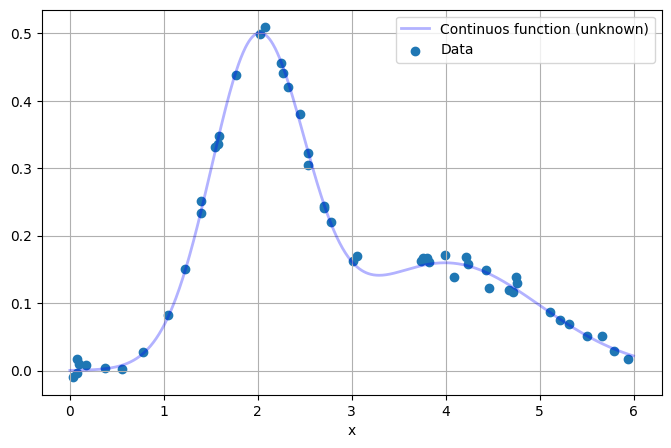

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_1, std_1 = 2, 0.5  
mean_2, std_2 = 4, 1    
weight_1 = 0.6  
weight_2 = 0.4  
x = np.linspace(0, 6, 1000)
pdf_1 = norm.pdf(x, mean_1, std_1)
pdf_2 = norm.pdf(x, mean_2, std_2)
mixture_pdf = weight_1 * pdf_1 + weight_2 * pdf_2
plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="Continuos function (unknown)", alpha=.3, color="blue", lw=2)
plt.xlabel("x")
plt.grid(True)
Xr = np.sort(6 * np.random.rand(50))  
pdf_1 = norm.pdf(Xr, mean_1, std_1)
pdf_2 = norm.pdf(Xr, mean_2, std_2)
yr = weight_1 * pdf_1 + weight_2 * pdf_2
yr += np.random.normal(0,.01,len(yr))
plt.scatter(Xr, yr,label="Data")
plt.legend()
plt.show()

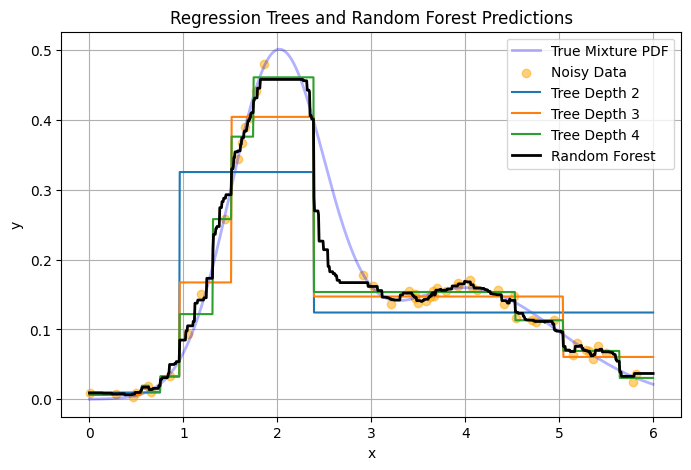

In [290]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

mean_1, std_1 = 2, 0.5  
mean_2, std_2 = 4, 1    
weight_1 = 0.6  
weight_2 = 0.4  
x = np.linspace(0, 6, 1000)
pdf_1 = norm.pdf(x, mean_1, std_1)
pdf_2 = norm.pdf(x, mean_2, std_2)
mixture_pdf = weight_1 * pdf_1 + weight_2 * pdf_2
Xr = np.sort(6 * np.random.rand(50))  
pdf_1 = norm.pdf(Xr, mean_1, std_1)
pdf_2 = norm.pdf(Xr, mean_2, std_2)
yr = weight_1 * pdf_1 + weight_2 * pdf_2
yr += np.random.normal(0, 0.01, len(yr)) 
Xr = Xr.reshape(-1, 1) 

plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="True Mixture PDF", alpha=.3, color="blue", lw=2)
plt.scatter(Xr, yr, label="Noisy Data", color="orange", alpha=0.5)

# Train and plot the predictions for trees with depths 2, 3, and 4
for depth in [2, 3, 4]:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(Xr, yr)
    y_pred_tree = tree.predict(x.reshape(-1, 1))  # Make predictions over the full x range
    plt.plot(x, y_pred_tree, label=f"Tree Depth {depth}")

# Train and plot the prediction for Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Xr, yr)
y_pred_rf = rf.predict(x.reshape(-1, 1))  # Use the same x values for predictions
plt.plot(x, y_pred_rf, label="Random Forest", color='black', lw=2)

# Final plot details
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Regression Trees and Random Forest Predictions")
plt.show()


Regression Trees (Depth 2, 3, 4):
With depth 2, the decision tree is very simple and underfits the data, leading to a very rough and oversimplified fit.
As the depth increases (3, 4), the tree becomes more flexible and better fits the noisy data, but it is still unnderfitting as we can see above.
The random forest gives a much smoother prediction. Since it combines multiple decision trees (each trained on a random subset of the data), it reduces the overfitting seen in individual deep decision trees. This results in a more generalized and smoother prediction.

The impurity criterion used by both the decision trees and the random forest is mean squared error (MSE), which is the default for regression tasks in scikit-learn.

# AdaBoost + stump (bonus question)
## Exercise 7 (+13)

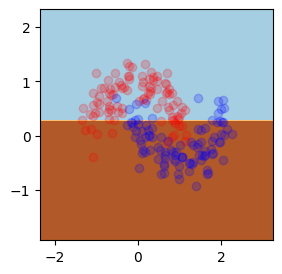

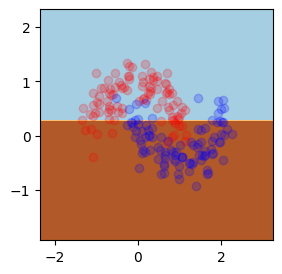

In [ ]:
from sklearn import tree

class My_stump:
  
  def __init__(self):
    self.best_dimension = None
    self.best_threshold = None
    self.class_below_threshold = None
    self.class_above_threshold = None
    self.best_gini = float('inf')
    
  def get_threshold(self): 
      return self.best_threshold
      
  def get_best(self): 
      return self.best_dimension, self.best_threshold, self.best_gini
    
  def gini(self, y_left, y_right, w_left=None, w_right=None):
    """
    Calculate Gini impurity for a split with weighted samples.
    """
    if w_left is None:
        w_left = np.ones(len(y_left))
    if w_right is None:
        w_right = np.ones(len(y_right))
    
    # Total weights
    W_left = np.sum(w_left)
    W_right = np.sum(w_right)
    W_total = W_left + W_right
    
    if W_left == 0 or W_right == 0:
        return 1.0  # Worst possible Gini value
    
    # For binary classification with y in {-1, 1}
    w_pos_left = np.sum(w_left[y_left == 1])
    w_neg_left = W_left - w_pos_left
    
    w_pos_right = np.sum(w_right[y_right == 1])
    w_neg_right = W_right - w_pos_right
    
    # Calculate Gini for left and right regions
    gini_left = 1 - (w_pos_left / W_left)**2 - (w_neg_left / W_left)**2
    gini_right = 1 - (w_pos_right / W_right)**2 - (w_neg_right / W_right)**2
    
    # Weighted average of Gini impurities
    gini_split = (W_left / W_total) * gini_left + (W_right / W_total) * gini_right
    
    return gini_split
    
  def fit(self, X, y, sample_weight=None):
    if sample_weight is None: 
        sample_weight = np.ones(len(X))
    
    n_samples, n_features = X.shape
    self.best_gini = float('inf')
    
    # We only consider the 2 features as specified
    for dimension in [0, 1]:
      # Sort data points by the current feature
      sorted_indices = np.argsort(X[:, dimension])
      sorted_X = X[sorted_indices, dimension]
      sorted_y = y[sorted_indices]
      sorted_weights = sample_weight[sorted_indices]
      
      # Initialize weights for left (initially empty) and right (all samples) partitions
      # Left partition: samples with feature value < threshold
      # Right partition: samples with feature value >= threshold
      w_left_pos = 0
      w_left_neg = 0
      w_right_pos = np.sum(sorted_weights[sorted_y == 1])
      w_right_neg = np.sum(sorted_weights[sorted_y == -1])
      
      # Evaluate all possible split points
      for i in range(n_samples - 1):
        # Move one sample from right to left partition
        if sorted_y[i] == 1:
            w_left_pos += sorted_weights[i]
            w_right_pos -= sorted_weights[i]
        else:
            w_left_neg += sorted_weights[i]
            w_right_neg -= sorted_weights[i]
        
        # Skip if the next value is the same as current (avoid trivial splits)
        if sorted_X[i] == sorted_X[i + 1]:
            continue
        
        # Calculate threshold as midpoint between current and next value
        threshold = (sorted_X[i] + sorted_X[i + 1]) / 2
        
        # Calculate Gini impurity for this split
        w_left = np.array([w_left_neg, w_left_pos])
        w_right = np.array([w_right_neg, w_right_pos])
        y_left = np.array([-1, 1])  # Representing the two classes
        y_right = np.array([-1, 1])
        
        gini_value = 0
        if w_left[0] + w_left[1] > 0:  # If left partition is not empty
            gini_left = 1 - (w_left[0] / np.sum(w_left))**2 - (w_left[1] / np.sum(w_left))**2
            gini_value += (np.sum(w_left) / np.sum(w_left + w_right)) * gini_left
        
        if w_right[0] + w_right[1] > 0:  # If right partition is not empty
            gini_right = 1 - (w_right[0] / np.sum(w_right))**2 - (w_right[1] / np.sum(w_right))**2
            gini_value += (np.sum(w_right) / np.sum(w_left + w_right)) * gini_right
        
        # Update best split if this one is better
        if gini_value < self.best_gini:
            self.best_gini = gini_value
            self.best_dimension = dimension
            self.best_threshold = threshold
            
            # Determine majority class for each side of the split
            if w_left[1] > w_left[0]:
                self.class_below_threshold = 1
            else:
                self.class_below_threshold = -1
                
            if w_right[1] > w_right[0]:
                self.class_above_threshold = 1
            else:
                self.class_above_threshold = -1

  def predict(self, X):
    if self.best_dimension is None:
        raise ValueError("Fit the model first")
        
    res = []
    for x in X[:, self.best_dimension]:
      if x < self.best_threshold:
        res.append(self.class_below_threshold)
      else:
        res.append(self.class_above_threshold)
    return np.array(res)


  
dataset = datasets[1]
X = dataset[0]
y = dataset[1]*2-1 # For AdaBoost y={-1,+1} but the rest can be y={0,1} 
w = np.ones(len(X))

my_stump = My_stump()
my_stump.fit(X, y, w)
plot_tree(my_stump,X,y)

# Sanity check: my_stump should be the same as the decisionTree of depth=1
clf = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
plot_tree(clf,X,y)

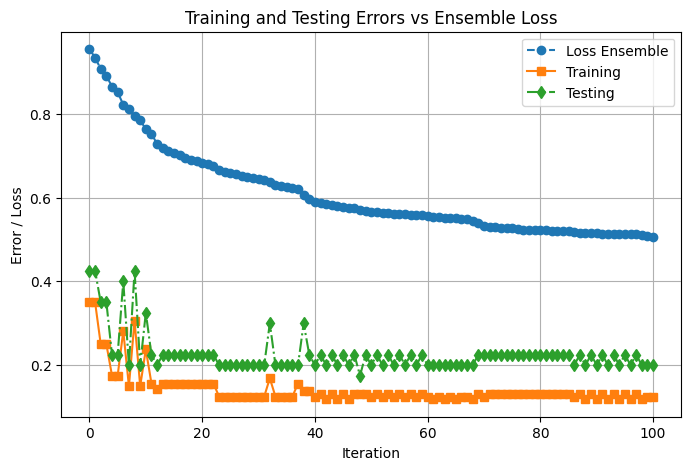

In [292]:
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
def compute_error(y, y_pred, w_m):
    return np.sum(w_m * (y != y_pred)) / np.sum(w_m)


def compute_alpha(error):
    epsilon = 1e-10
    error = max(min(error, 1 - epsilon), epsilon)
    return 0.5 * np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred, error):
     # Calculate the new weights
    w_i_plus_1 = w_i * np.exp(-alpha * y * y_pred)
    
    # Normalize to make sure the weights sum to 1
    return w_i_plus_1 / np.sum(w_i_plus_1)
  
class AdaBoost:
    
    def __init__(self):
        self.alphas = [] # list of coefficients for the classifiers
        self.G_M = [] # list of wesk clssifier
        self.M = None # number of iterations
        # we save the error for plotting the evoltion of the performance
        self.training_errors = []
        self.testing_errors = []
        self.loss_ensemble = []
    
    def predict(self, X):
        y_pred = np.zeros(len(X))
    
        # Sum up the predictions of all weak classifiers
        for m in range(len(self.G_M)):
            y_pred += self.alphas[m] * self.G_M[m].predict(X)
        # Return the sign of the prediction
        return np.sign(y_pred)

    def fit(self, X, y, M = 1, X_test=None, y_test=None):
        self.alphas = [] 
        self.G_M = []
        self.training_errors, self.testing_errors = [],[]
        self.loss_ensemble = []
        self.M = M
        Z=1

        # Iterate over M weak classifiers
        for m in range(0, M):
            # Set weights for current boosting iteration
            if m == 0:
                w_m = np.ones(len(y)) * 1 / len(y)  
            else:
                w_m = update_weights(w_m, alpha_m, y, y_pred, error_m)

            # Now, we can use our stumps...
            G_m = DecisionTreeClassifier(max_depth = 1) # Stump from sklearn
            G_m.fit(X, y, sample_weight = w_m)
            y_pred = G_m.predict(X)
            """
            # ... or the ones from sklearn
            G_m_my = My_stump() # Stump coded in the previous (bonus) question
            G_m_my.fit(X, y, sample_weight = w_m)
            my_pred = G_m_my.predict(X) 
            """
            
            # Calculate error and alpha for this classifier
            error_m = compute_error(y, y_pred, w_m)
            alpha_m = compute_alpha(error_m)
        
            # Store the classifier and its weight
            self.G_M.append(G_m)
            self.alphas.append(alpha_m)
        
            # Calculate and store the training error
            y_train_pred = self.predict(X)
            train_error = np.mean(y != y_train_pred)
            self.training_errors.append(train_error)
        
            # Calculate and store the exponential loss
            exp_loss = np.mean(np.exp(-y * np.sum([a * g.predict(X) for a, g in zip(self.alphas, self.G_M)], axis=0)))
            self.loss_ensemble.append(exp_loss)
            
            # If test data is provided, calculate and store the test error
            if X_test is not None and y_test is not None:
                y_test_pred = self.predict(X_test)
                test_error = np.mean(y_test != y_test_pred)
                self.testing_errors.append(test_error)
        
        

dataset = datasets[2]
X = dataset[0]
y = dataset[1]*2-1 # For the AdaBoost y={-1,+1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ab = AdaBoost()
ab.fit(X_train, y_train, M = 101, X_test=X_test, y_test=y_test)
plt.figure(figsize=(8, 5))
plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
plt.plot(ab.training_errors, label="Training", linestyle="-", marker="s")
plt.plot(ab.testing_errors, label="Testing", linestyle="-.", marker="d")
plt.xlabel("Iteration")
plt.ylabel("Error / Loss")
plt.title("Training and Testing Errors vs Ensemble Loss")
plt.legend()
plt.grid(True)
plt.show()

# AUC ROC - AUC PR

[[-0.30090843 -0.02691173]
 [ 0.22689129  0.04835774]
 [-1.41619219  0.17303298]
 ...
 [-0.28991052  0.6111703 ]
 [ 0.28086245 -0.4231353 ]
 [-0.51549572  0.2384468 ]]
[1 1 0 ... 0 1 0]


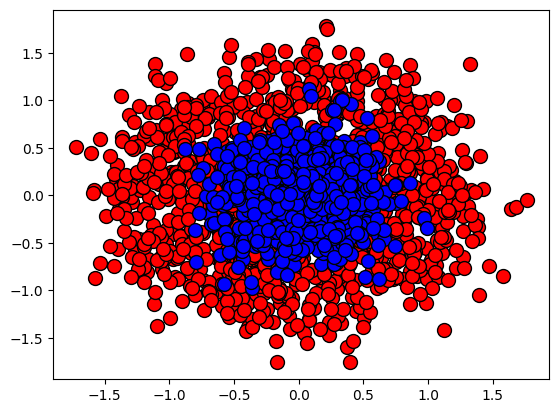

In [293]:
X,y = make_circles(n_samples = 2000, noise=0.3, factor=0.1)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)

print(X)
print(y)

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr(proba, y_true):
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_true, proba)
    roc_auc = auc(fpr, tpr) 
    
    # Compute Precision-Recall curve and PR AUC
    precision, recall, _ = precision_recall_curve(y_true, proba)
    pr_auc = average_precision_score(y_true, proba)
    
    # Plot ROC Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()
    
def subsample_data(X, y, keep_ratio=0.4):
    """Subsample dataset to keep all class 1 and only a fraction of class 0."""
    class_1_mask = y == 0
    class_0_mask = y == 1
    X_class_1 = X[class_1_mask]
    y_class_1 = y[class_1_mask]
    X_class_0 = X[class_0_mask]
    y_class_0 = y[class_0_mask]
    np.random.seed(0)
    sample_indices = np.random.choice(len(X_class_0), int(len(X_class_0) * keep_ratio), replace=False)
    X_class_0 = X_class_0[sample_indices]
    y_class_0 = y_class_0[sample_indices]
    X_subsampled = np.vstack((X_class_1, X_class_0))
    y_subsampled = np.hstack((y_class_1, y_class_0))
    return X_subsampled, y_subsampled

**Question 9:**

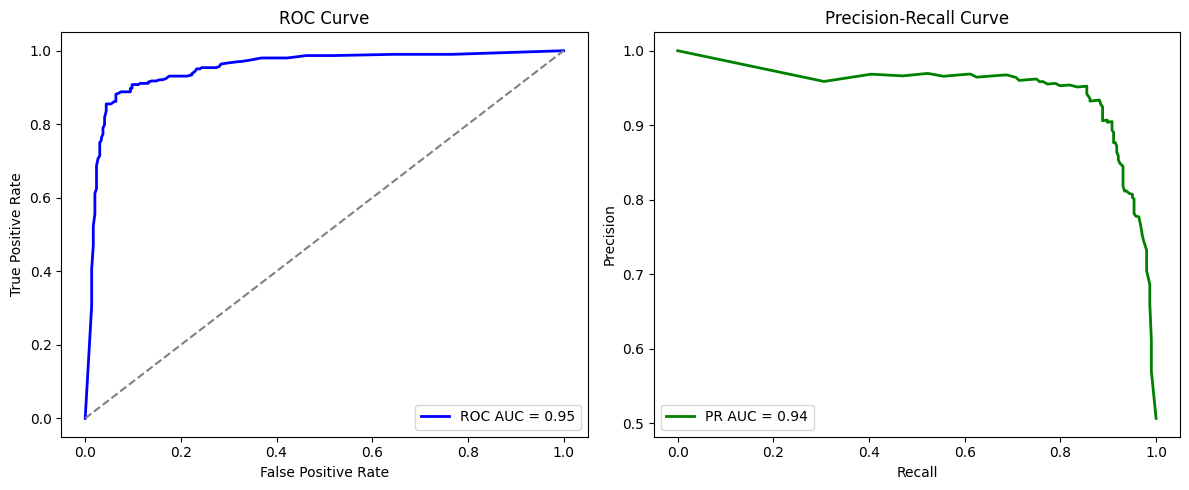

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
proba = clf.predict_proba(X_test)[:, 1]
# Plot ROC and PR curves
plot_roc_pr(proba, y_test)


**Question 10:** Discard a percentage of the positive data using the subsample_data function provided and plot the ROC and PR curves again. Comment on the differences.

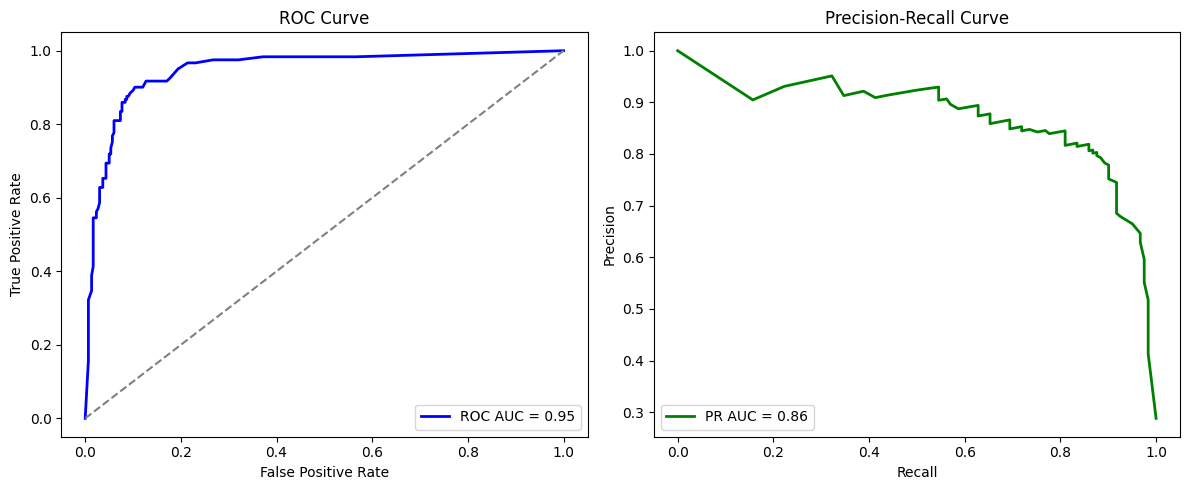

In [296]:
X_subsampled, y_subsampled = subsample_data(X, y, keep_ratio=0.4)
X_train, X_test, y_train, y_test = train_test_split(X_subsampled, y_subsampled, test_size=0.3, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
proba = clf.predict_proba(X_test)[:, 1]
# Plot ROC and PR curves
plot_roc_pr(proba, y_test)


**Comments:**

We notice that when we introduce class imbalance, the ROC AUC remain exactly the same as the one for the imbalanced dataset, however, the PR AUC decreases. And that was expected as we saw in the course: 
- Precision-Recall curves are much more sensitive to class imbalance. As positive examples become rare, achieving high precision becomes significantly harder. Even a small number of false positives can drastically reduce precision when there are few true positives.
- ROC curves are relatively robust to class imbalance since they consider the true positive rate against the false positive rate, both of which are normalized within their respective classes.

**Question 11:**

For binary classification, define:
- Y = 1 for positive class, Y = 0 for negative class
- $\hat Y$ = 1 for positive prediction, $\hat Y$ = 0 for negative prediction

- **Precision:**
Precision is the proportion of correct positive predictions out of all positive predictions so precision = P(Y = 1 | $\hat Y$ = 1)
- **Recall:**
Recall is the proportion of positive instances correctly identified so recall = P($\hat Y$ = 1 | Y = 1)
- **False Positive Rate:**
False positive rate is the proportion of negative instances incorrectly classified as positive so FPR = P($\hat Y$ = 1 | Y = 0)
- **True Positive Rate:**
True positive rate is identical to recall so TPR = P($\hat Y$ = 1 | Y = 1)

**Question 12:**

$$F_1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
$$F_1 = 2 \times \frac{P(Y = 1 | \hat Y = 1) \times P(\hat Y = 1 | Y = 1)}{P(Y = 1 | \hat Y = 1) + P(\hat Y = 1 | Y = 1)}$$